# **การเข้าถึงตลาดการเงินสามารถเข้าได้หลายรูปแบบ**
- yfinance
  เป็นแพคเกจ ให้เข้าถึง Yahoo! ข้อมูลตลาดการเงิน
  
  โดย yfinance จะ returns a pandas.DataFrame with multi-level column names
  
  การนำเข้าข้อมูลราคาหุ้นไทยจากเว็บไซต์ https://finance.yahoo.com/ โดยใช้ Yahoo Finance API:(ผ่าน module yfinance)

ข้อจำกัดคือ

> ใช้ผ่าน Public API(ไม่มีการตรวจสอบสิทธิ์) จะถูกจำกัดไว้ที่ 2,000 คำขอต่อชั่วโมงต่อ IP ดังนั้นได้สูงสุด 48,000 คำขอต่อวัน



- pandas-datareader  
ดูเพิ่มเติม https://pydata.github.io/pandas-datareader/index.html
  
  เป็นการ extract data from various Internet sources into a pandas DataFrame.

 เช่น World Bank, FRED, Naver Finance, Yahoo Finance, etc.

# **การดึงข้อมูลตลาดหุ้นผ่าน yfinance**

เริ่มจากการ install yfinance

In [ ]:
! pip install yfinance

จากนั้น เข้าไปดู ticker ในเว็บไซต์ https://finance.yahoo.com/
แล้วทำการ download ข้อมูลมาเก็บไว้เป็นไฟล์ .csv

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina' #กำหนดรูปกราฟเป็นความละเอียดสูง

ตรวจสอบ version ของ pandas และ seaborn

In [ ]:
print(f"pandas version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas version = 1.5.3
seaborn version = 0.12.2


การอ่านหุ้นด้วยคำสั่ง yf.download

In [ ]:
stock_name = "CPALL.BK"
data = yf.download(stock_name, start="2021-06-01", end="2023-06-30")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(data) #พิจารณาข้อมูลที่ download มา

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2021-06-01  61.25  61.25  60.25  60.75  59.496288  27737500
2021-06-02  60.75  61.00  60.00  60.00  58.761768  22425700
2021-06-04  60.00  60.50  60.00  60.00  58.761768  21653900
2021-06-07  60.50  60.75  60.00  60.00  58.761768  11574800
2021-06-08  60.00  60.75  59.75  60.00  58.761768  17748400
...           ...    ...    ...    ...        ...       ...
2023-06-23  61.75  62.00  61.25  61.75  61.750000   8601500
2023-06-26  61.75  62.25  61.50  62.00  62.000000  11173200
2023-06-27  62.00  62.25  61.50  61.50  61.500000  15063100
2023-06-28  61.75  62.25  61.50  61.50  61.500000   9948600
2023-06-29  61.50  61.50  60.75  61.00  61.000000  19305700

[505 rows x 6 columns]


ข้อมูลที่ดาวน์โหลดมาด้วยคำสั่ง yf.download จะมี Date เป็น index

และเขียนลงในไฟล์ .csv และ .xlsx

In [ ]:
data.to_csv("CPALL.csv")
data.to_excel("CPALL.xlsx")


พิจารณาข้อมูลที่ได้ผ่านคำสั่งต่างๆ เช่น info, head และ columns ดังนี้

In [ ]:
data.info()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,61.25,61.25,60.25,60.75,59.496288,27737500
2021-06-02,60.75,61.00,60.00,60.00,58.761768,22425700
2021-06-04,60.00,60.50,60.00,60.00,58.761768,21653900
2021-06-07,60.50,60.75,60.00,60.00,58.761768,11574800
2021-06-08,60.00,60.75,59.75,60.00,58.761768,17748400


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

จากนั้นอ่านข้อมูลจากไฟล์ที่เขียนไว้ก่อนหน้า โดยไม่ได้ระบุ index ที่เป็น Date
จะได้ index แบบ implicit

In [ ]:
df1 =   pd.read_csv('CPALL.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,61.25,61.25,60.25,60.75,59.496288,27737500
1,2021-06-02,60.75,61.00,60.00,60.00,58.761768,22425700
2,2021-06-04,60.00,60.50,60.00,60.00,58.761768,21653900
3,2021-06-07,60.50,60.75,60.00,60.00,58.761768,11574800
4,2021-06-08,60.00,60.75,59.75,60.00,58.761768,17748400
...,...,...,...,...,...,...,...
500,2023-06-23,61.75,62.00,61.25,61.75,61.750000,8601500
501,2023-06-26,61.75,62.25,61.50,62.00,62.000000,11173200
502,2023-06-27,62.00,62.25,61.50,61.50,61.500000,15063100
503,2023-06-28,61.75,62.25,61.50,61.50,61.500000,9948600


ทำการระบุ index เพื่อให้ข้อมูลเป็นแบบ Time series

In [ ]:
df = pd.read_csv('CPALL.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,61.25,61.25,60.25,60.75,59.496288,27737500
2021-06-02,60.75,61.00,60.00,60.00,58.761768,22425700
2021-06-04,60.00,60.50,60.00,60.00,58.761768,21653900
2021-06-07,60.50,60.75,60.00,60.00,58.761768,11574800
2021-06-08,60.00,60.75,59.75,60.00,58.761768,17748400
...,...,...,...,...,...,...
2023-06-23,61.75,62.00,61.25,61.75,61.750000,8601500
2023-06-26,61.75,62.25,61.50,62.00,62.000000,11173200
2023-06-27,62.00,62.25,61.50,61.50,61.500000,15063100


การระบุข้อมูล index ให้เป็น Time Series สามารถทำโดยใช้คำสั่ง set_index


ด้วยการกำหนด column Date ให้เป็น index กรณีต้องการยกเลิก index ใช้คำสั่ง reset_index()

In [ ]:
df2 = df1.set_index("Date")
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,61.25,61.25,60.25,60.75,59.496288,27737500
2021-06-02,60.75,61.00,60.00,60.00,58.761768,22425700
2021-06-04,60.00,60.50,60.00,60.00,58.761768,21653900
2021-06-07,60.50,60.75,60.00,60.00,58.761768,11574800
2021-06-08,60.00,60.75,59.75,60.00,58.761768,17748400
...,...,...,...,...,...,...
2023-06-23,61.75,62.00,61.25,61.75,61.750000,8601500
2023-06-26,61.75,62.25,61.50,62.00,62.000000,11173200
2023-06-27,62.00,62.25,61.50,61.50,61.500000,15063100


In [ ]:
df.Close

Date
2021-06-01    60.75
2021-06-02    60.00
2021-06-04    60.00
2021-06-07    60.00
2021-06-08    60.00
              ...  
2023-06-23    61.75
2023-06-26    62.00
2023-06-27    61.50
2023-06-28    61.50
2023-06-29    61.00
Name: Close, Length: 505, dtype: float64

การอ่านข้อมูลหุ้นผ่านคำสั่ง  yf.Ticker

In [ ]:
ktb = yf.Ticker("KTB.BK")
hist = ktb.history(start="2022-01-01", end="2022-05-30")
#หากต้องการดึงข้อมูลย้อนหลัง 3 วัน ใช้ parameter period
#ตัวอย่างคำสั่ง hist = scb.history(period="3d")
print(hist) #กรณีนี้จำนวน columnsที่ได้และรูปแบบของ index จะแตกต่างกับ yf.download

                                Open       High        Low      Close  \
Date                                                                    
2022-01-04 00:00:00+07:00  12.467204  12.839360  12.374166  12.560244   
2022-01-05 00:00:00+07:00  12.560244  12.746322  12.467205  12.746322   
2022-01-06 00:00:00+07:00  12.746321  12.746321  12.374166  12.560244   
2022-01-07 00:00:00+07:00  12.560244  12.653283  12.467204  12.560244   
2022-01-10 00:00:00+07:00  12.560244  12.932399  12.560244  12.839360   
...                              ...        ...        ...        ...   
2022-05-23 00:00:00+07:00  14.312613  14.408671  14.216555  14.312613   
2022-05-24 00:00:00+07:00  14.408670  14.408670  14.216555  14.216555   
2022-05-25 00:00:00+07:00  14.216555  14.408670  14.120497  14.120497   
2022-05-26 00:00:00+07:00  14.120496  14.312612  14.120496  14.216555   
2022-05-27 00:00:00+07:00  14.312612  14.408670  14.216555  14.408670   

                             Volume  Dividends  St

ปรับแก้ไข index จาก datetime ให้เป็น date

In [ ]:
hist.reset_index(inplace = True)
hist['Date'] = pd.to_datetime(hist['Date']).dt.date
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-04,12.467204,12.839360,12.374166,12.560244,89588200,0.0,0.0
1,2022-01-05,12.560244,12.746322,12.467205,12.746322,64636500,0.0,0.0
2,2022-01-06,12.746321,12.746321,12.374166,12.560244,49693300,0.0,0.0
3,2022-01-07,12.560244,12.653283,12.467204,12.560244,31579000,0.0,0.0
4,2022-01-10,12.560244,12.932399,12.560244,12.839360,50282400,0.0,0.0
...,...,...,...,...,...,...,...,...
91,2022-05-23,14.312613,14.408671,14.216555,14.312613,27932100,0.0,0.0
92,2022-05-24,14.408670,14.408670,14.216555,14.216555,30555200,0.0,0.0
93,2022-05-25,14.216555,14.408670,14.120497,14.120497,40387900,0.0,0.0
94,2022-05-26,14.120496,14.312612,14.120496,14.216555,22480700,0.0,0.0


ทำให้ Date เป็น index เหมือนเดิม

In [ ]:
hist.set_index('Date', inplace = True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-04,12.467204,12.839360,12.374166,12.560244,89588200,0.0,0.0
2022-01-05,12.560244,12.746322,12.467205,12.746322,64636500,0.0,0.0
2022-01-06,12.746321,12.746321,12.374166,12.560244,49693300,0.0,0.0
2022-01-07,12.560244,12.653283,12.467204,12.560244,31579000,0.0,0.0
2022-01-10,12.560244,12.932399,12.560244,12.839360,50282400,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-23,14.312613,14.408671,14.216555,14.312613,27932100,0.0,0.0
2022-05-24,14.408670,14.408670,14.216555,14.216555,30555200,0.0,0.0
2022-05-25,14.216555,14.408670,14.120497,14.120497,40387900,0.0,0.0


แต่ได้ Data มาแล้ว อย่าลืมเช็ค
มีราคาอยู่หลายแบบ จะเลือกใช้อย่างไร?

* ส่วนมากใช้ราคาปิด
* วันของตลาดหุ้นอาจรวมวันหยุด หรือไม่รวม
* ข้อมูลขาดๆหายๆ ไม่เท่ากันในแต่ละเดือน


# การดึงข้อมูลหุ้นด้วย datareader

In [ ]:
! pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr

#read 5-years of 10-year constant muturity yields on U.S. government bonds
#https://fred.stlouisfed.org/series/GS10
df_fred = pdr.get_data_fred('GS10')

In [ ]:
print(df_fred)

            GS10
DATE            
2018-10-01  3.15
2018-11-01  3.12
2018-12-01  2.83
2019-01-01  2.71
2019-02-01  2.68
2019-03-01  2.57
2019-04-01  2.53
2019-05-01  2.40
2019-06-01  2.07
2019-07-01  2.06
2019-08-01  1.63
2019-09-01  1.70
2019-10-01  1.71
2019-11-01  1.81
2019-12-01  1.86
2020-01-01  1.76
2020-02-01  1.50
2020-03-01  0.87
2020-04-01  0.66
2020-05-01  0.67
2020-06-01  0.73
2020-07-01  0.62
2020-08-01  0.65
2020-09-01  0.68
2020-10-01  0.79
2020-11-01  0.87
2020-12-01  0.93
2021-01-01  1.08
2021-02-01  1.26
2021-03-01  1.61
2021-04-01  1.64
2021-05-01  1.62
2021-06-01  1.52
2021-07-01  1.32
2021-08-01  1.28
2021-09-01  1.37
2021-10-01  1.58
2021-11-01  1.56
2021-12-01  1.47
2022-01-01  1.76
2022-02-01  1.93
2022-03-01  2.13
2022-04-01  2.75
2022-05-01  2.90
2022-06-01  3.14
2022-07-01  2.90
2022-08-01  2.90
2022-09-01  3.52
2022-10-01  3.98
2022-11-01  3.89
2022-12-01  3.62
2023-01-01  3.53
2023-02-01  3.75
2023-03-01  3.66
2023-04-01  3.46
2023-05-01  3.57
2023-06-01  3.

### Data readers กับข้อมูลใน web stooq

https://stooq.com/

In [ ]:
import pandas_datareader.data as web

df = web.get_data_stooq('^DJI')
df.info

<bound method DataFrame.info of                 Open      High       Low     Close       Volume
Date                                                           
2023-09-11  34650.01  34784.52  34578.59  34663.72  295646178.0
2023-09-08  34487.41  34627.85  34473.57  34576.59  296556277.0
2023-09-07  34351.18  34560.86  34351.18  34500.73  392758749.0
2023-09-06  34611.68  34611.68  34291.56  34443.19  309202233.0
2023-09-05  34843.22  34871.26  34635.63  34641.97  286902618.0
...              ...       ...       ...       ...          ...
2018-09-19  26287.84  26464.41  26280.76  26405.76  251293312.0
2018-09-18  26076.21  26317.34  26076.21  26246.96  242967532.0
2018-09-17  26151.66  26184.47  26030.35  26062.12  230236344.0
2018-09-14  26169.56  26211.11  26068.29  26154.67  228706017.0
2018-09-13  26083.94  26191.64  26067.08  26145.99  260810035.0

[1256 rows x 5 columns]>

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-11,34650.01,34784.52,34578.59,34663.72,295646178.0
2023-09-08,34487.41,34627.85,34473.57,34576.59,296556277.0
2023-09-07,34351.18,34560.86,34351.18,34500.73,392758749.0
2023-09-06,34611.68,34611.68,34291.56,34443.19,309202233.0
2023-09-05,34843.22,34871.26,34635.63,34641.97,286902618.0
...,...,...,...,...,...
2018-09-19,26287.84,26464.41,26280.76,26405.76,251293312.0
2018-09-18,26076.21,26317.34,26076.21,26246.96,242967532.0
2018-09-17,26151.66,26184.47,26030.35,26062.12,230236344.0


### ดึงข้อมูลผ่าน yahoo finance โดยใช้ datareader

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as web

yf.pdr_override() # ตัวแก้ pandas_datareader ให้โหลดจาก yahoo finance ได้

In [ ]:
df = web.get_data_yahoo('GE', start='2022-09-10', end='2022-10-09')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-12,58.087433,59.711163,57.970337,58.797813,58.570610,9306849
2022-09-13,57.189697,57.658081,55.128807,55.300545,55.086861,9237035
2022-09-14,55.191257,55.425449,53.614365,54.668228,54.456985,7955394
2022-09-15,54.473068,55.261513,53.669010,53.793911,53.586048,6311871
2022-09-16,51.053864,51.990631,50.882122,51.826698,51.626431,18329573
2022-09-19,51.202187,52.685402,51.100704,52.341919,52.139664,6420628
2022-09-20,51.873535,52.459015,51.475410,51.982826,51.781960,6687845
2022-09-21,52.318501,52.357533,50.866512,50.913349,50.716614,8112317
2022-09-22,50.741608,51.295864,50.366901,51.022640,50.825485,9054492


# **ตัวอย่างการดึงข้อมูลที่เป็น Time series**

In [ ]:
import yfinance as yf
yf.pdr_override() # ตัวแก้ pandas_datareader ให้โหลดจาก yahoo finance ได้
import pandas_datareader.data as web # ไลบรารีที่เราจะใช้ดึงข้อมูลหุ้น
import datetime as dt # ไลบรารีที่เราจะใช้สำหรับงานที่เกี่ยวข้องกับ วันเวลา
import pandas as pd # ไลบรารีที่เราจะใช้ทำงานเกี่ยวกับตาราง (Dataframe)

stock_name = "PTT.BK" # ใส่ชื่อของหุ้นที่เราจะดึงข้อมูล ในที่นี้คือ PTT
start_date = dt.date(2020,8,1) # กำหนดวันแรกที่จะดึงข้อมูล
end_date = dt.date(2022,8,30) # กำหนดวันสุดท้ายที่จะดึงข้อมูล
#ดึงข้อมูลมาเก็บไว้ในตัวแปร df
df = web.get_data_yahoo(stock_name, start_date, end_date)
df.to_csv("PTT.csv")# save ข้อมูลหุ้นเก็บไว้เป็นไฟล์ .csv

[*********************100%%**********************]  1 of 1 completed


**แบบที่ 1**
ดึงข้อมูลจากไฟล์ .csv แล้วกำหนด index เป็น Date
เพื่อจัดการข้อมูลแบบ time series

In [ ]:
df = pd.read_csv('PTT.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,39.00,39.00,38.25,38.50,33.665920,35058600
2020-08-04,38.75,39.00,38.00,38.00,33.228695,60854500
2020-08-05,38.25,39.25,38.00,39.00,34.103138,61561600
2020-08-06,38.75,39.50,38.50,38.75,33.884525,34953700
2020-08-07,38.50,38.75,37.75,38.25,33.447300,59234200
...,...,...,...,...,...,...
2022-08-23,36.75,37.75,36.75,37.50,35.382175,47634400
2022-08-24,37.75,38.25,37.50,37.75,35.618053,96869700
2022-08-25,37.75,38.00,37.50,37.75,35.618053,42514900


**แบบที่ 2**

อ่านข้อมูลจากไฟล์ .csv แล้วกำหนด column Date เป็น index

In [ ]:
import numpy as np

# ดึงข้อมูลหุ้นที่ save เก็บไว้มาไว้ในตัวแปร df1
df1 = pd.read_csv('PTT.csv')
# แปลง column Date ให้เป็นชนิดตัวแปร datetime (วันเวลา)
df1['Date']= df1['Date'].astype(np.datetime64)
# เปลี่ยน column Date ให้เป็น index เพื่อที่จะใช้งานได้ง่ายๆ
df1 = df1.set_index('Date')

In [ ]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,39.00,39.00,38.25,38.50,33.665920,35058600
2020-08-04,38.75,39.00,38.00,38.00,33.228695,60854500
2020-08-05,38.25,39.25,38.00,39.00,34.103138,61561600
2020-08-06,38.75,39.50,38.50,38.75,33.884525,34953700
2020-08-07,38.50,38.75,37.75,38.25,33.447300,59234200
...,...,...,...,...,...,...
2022-08-23,36.75,37.75,36.75,37.50,35.382175,47634400
2022-08-24,37.75,38.25,37.50,37.75,35.618053,96869700
2022-08-25,37.75,38.00,37.50,37.75,35.618053,42514900


การ plot ข้อมูลตามช่วงเวลา

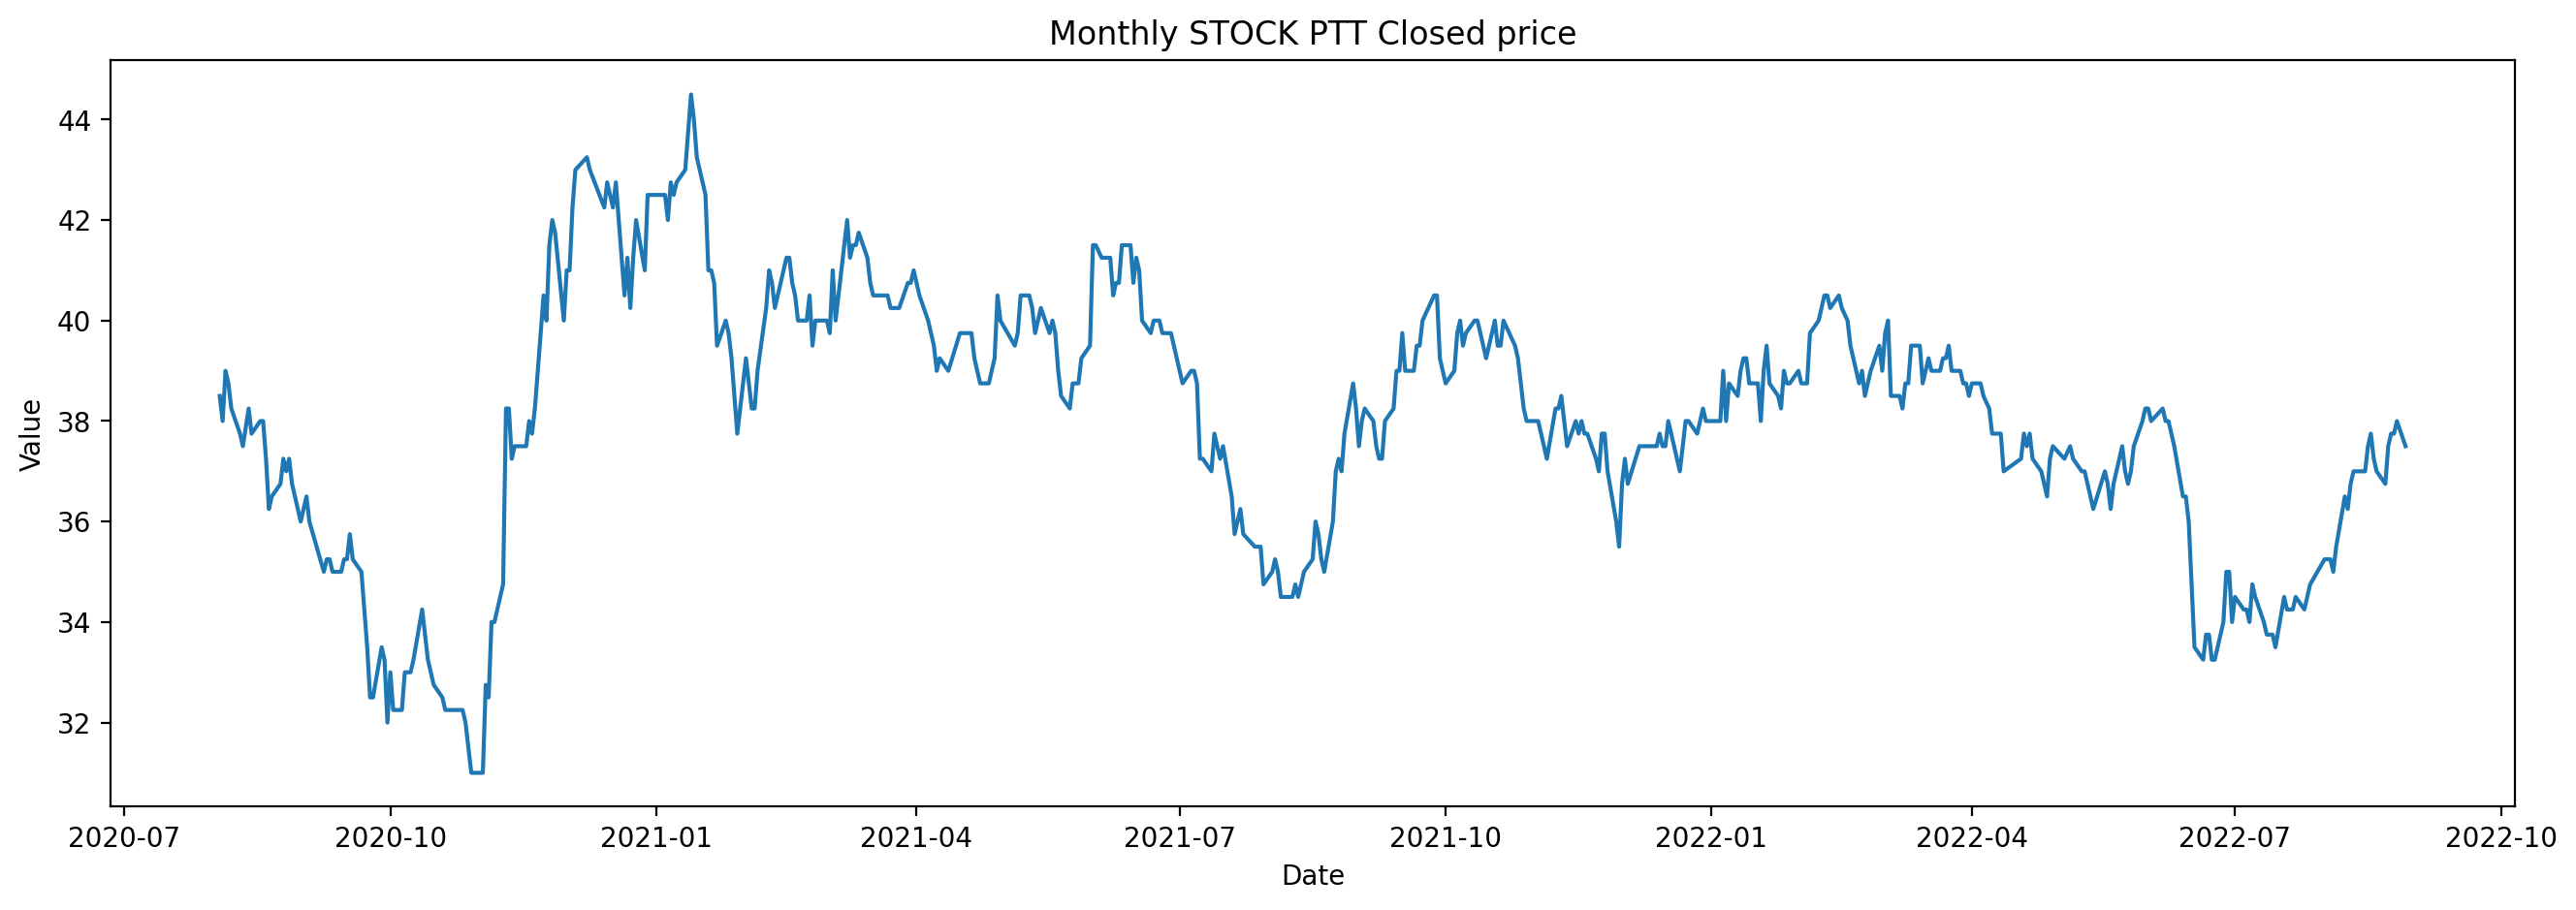

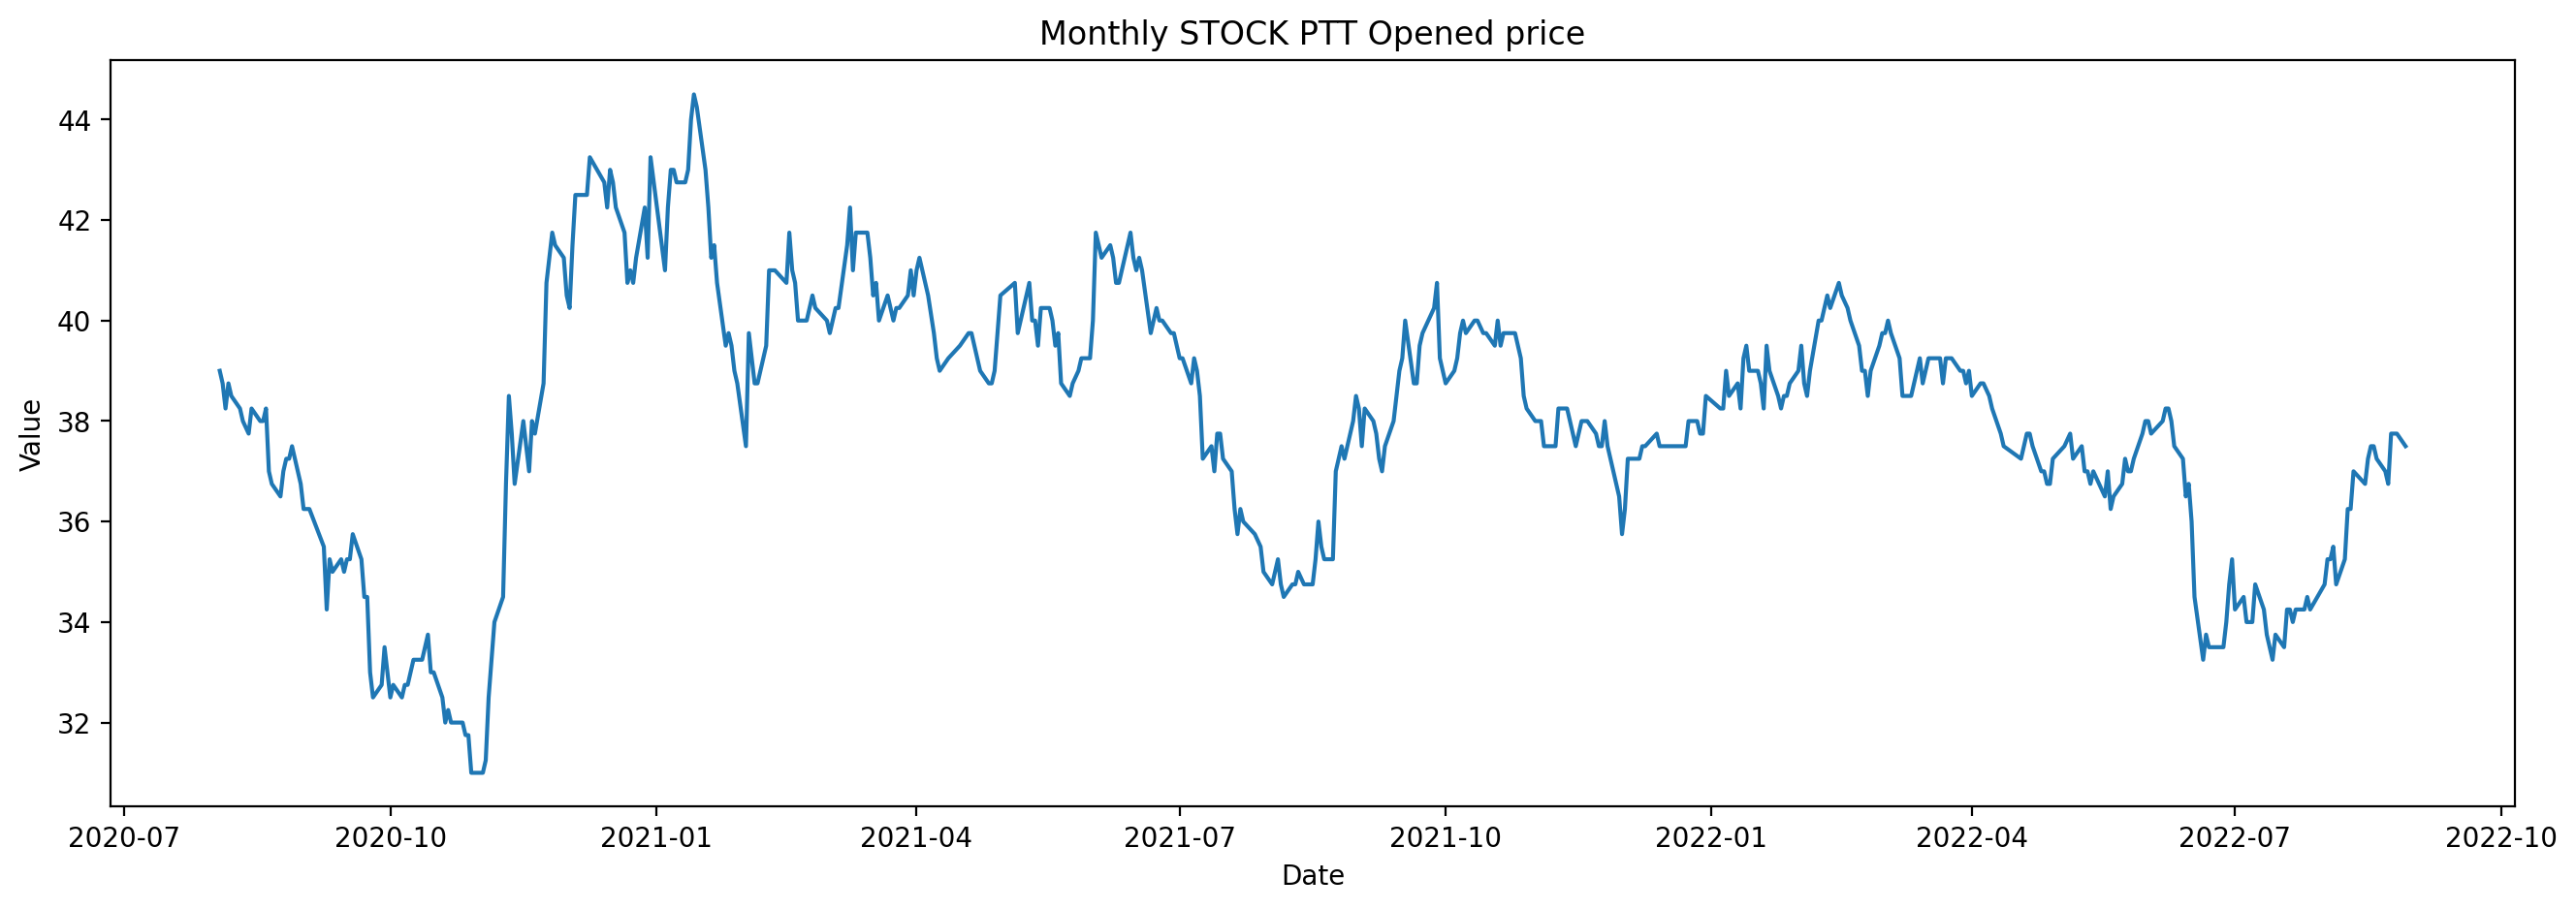

In [ ]:
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df1.index, y=df1.Close, title='Monthly STOCK PTT Closed price')
plot_df(df1, x=df1.index, y=df1.Open, title='Monthly STOCK PTT Opened price')